In [4]:
!pip install tensorflow

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path


In [6]:
#Membaca dataset CSV
df = pd.read_csv('/content/Books.csv')
df

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
117281  0688158269  The Chinese Kitchen: Recipes, Techniques, Ingr...   
117282  0312111053  The Year's Best Science Fiction: Eleventh Annu...   
117283  1582403597                             Dioramas: A Love Story   
117284  0201710919                       Planning Extreme Programming   
117285  0330350196                                        The Lexicon   

                 Book-Author  Year-Of-Publication  \
0         Mark P. O. Morford                 2002   
1       Richard Bruce Wright                 2001   
2               Carlo D'Este                 1991   
3           Gina Bari Kolata                 1999   
4            E. J. W. Barber                 1999   
...                      ...                  ...   
117281     Eileen Yin-Fei Lo                 1999   
117282        Gardner Dozois                 1994   
117283         Mark Ricketts                 2004   
117284             Kent Beck                 2000   
117285       Ngaire E. Genge                 1997   

                          Publisher  \
0           Oxford University Press   
1             HarperFlamingo Canada   
2                   HarperPerennial   
3              Farrar Straus Giroux   
4        W. W. Norton &amp; Company   
...                             ...   
117281             Morrow Cookbooks   
117282                St Martins Pr   
117283                 Image Comics   
117284  Addison-Wesley Professional   
117285                          Pan   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
117281  http://images.amazon.com/images/P/0688158269.0...   
117282  http://images.amazon.com/images/P/0312111053.0...   
117283  http://images.amazon.com/images/P/1582403597.0...   
117284  http://images.amazon.com/images/P/0201710919.0...   
117285                                                NaN   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
117281  http://images.amazon.com/images/P/0688158269.0...   
117282  http://images.amazon.com/images/P/0312111053.0...   
117283  http://images.amazon.com/images/P/1582403597.0...   
117284  http://images.amazon.com/images/P/0201710919.0...   
117285                                                NaN   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.amazon.com/images/P/0393045218.0...  
...                                                   ...  
117281  http://images.amazon.com/images/P/0688158269.0...  
117282  http://images.amazon.com/images/P/0312111053.0...  
117283  http://images.ama

In [7]:
#Membaca dataset CSv rating
df = pd.read_csv('/content/Ratings.csv')
df

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

In [8]:
#membaca dataset CSV User
df = pd.read_csv('/content/Users.csv')
df

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [9]:
books= pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

Melihat Jumlah Ketiga Dataframe

In [10]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(117286, 8)
(1149780, 3)
(278858, 3)


In [11]:
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
117281  0688158269  The Chinese Kitchen: Recipes, Techniques, Ingr...   
117282  0312111053  The Year's Best Science Fiction: Eleventh Annu...   
117283  1582403597                             Dioramas: A Love Story   
117284  0201710919                       Planning Extreme Programming   
117285  0330350196                                        The Lexicon   

                 Book-Author  Year-Of-Publication  \
0         Mark P. O. Morford                 2002   
1       Richard Bruce Wright                 2001   
2               Carlo D'Este                 1991   
3           Gina Bari Kolata                 1999   
4            E. J. W. Barber                 1999   
...                      ...                  ...   
117281     Eileen Yin-Fei Lo                 1999   
117282        Gardner Dozois                 1994   
117283         Mark Ricketts                 2004   
117284             Kent Beck                 2000   
117285       Ngaire E. Genge                 1997   

                          Publisher  \
0           Oxford University Press   
1             HarperFlamingo Canada   
2                   HarperPerennial   
3              Farrar Straus Giroux   
4        W. W. Norton &amp; Company   
...                             ...   
117281             Morrow Cookbooks   
117282                St Martins Pr   
117283                 Image Comics   
117284  Addison-Wesley Professional   
117285                          Pan   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
117281  http://images.amazon.com/images/P/0688158269.0...   
117282  http://images.amazon.com/images/P/0312111053.0...   
117283  http://images.amazon.com/images/P/1582403597.0...   
117284  http://images.amazon.com/images/P/0201710919.0...   
117285                                                NaN   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
117281  http://images.amazon.com/images/P/0688158269.0...   
117282  http://images.amazon.com/images/P/0312111053.0...   
117283  http://images.amazon.com/images/P/1582403597.0...   
117284  http://images.amazon.com/images/P/0201710919.0...   
117285                                                NaN   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.amazon.com/images/P/0393045218.0...  
...                                                   ...  
117281  http://images.amazon.com/images/P/0688158269.0...  
117282  http://images.amazon.com/images/P/0312111053.0...  
117283  http://images.ama

In [12]:
ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

In [13]:
users

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117286 entries, 0 to 117285
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 117286 non-null  object
 1   Book-Title           117286 non-null  object
 2   Book-Author          117286 non-null  object
 3   Year-Of-Publication  117286 non-null  int64 
 4   Publisher            117286 non-null  object
 5   Image-URL-S          117285 non-null  object
 6   Image-URL-M          117285 non-null  object
 7   Image-URL-L          117285 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.2+ MB


In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [17]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [18]:
ratings.isnull().sum(
)

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [19]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

# EDA - Inivariate Analysis

In [20]:
#Ratings Dataframe
ratings_users = ratings['User-ID'].nunique()
rated_books = ratings['ISBN'].nunique()
rating_values = ratings['Book-Rating'].nunique()

print(f"rating users: {ratings_users}")
print(f"rated_books : {rated_books}")
print(f"rating range : {rating_values}")

rating users: 105283
rated_books : 340556
rating range : 11


In [21]:
#Books Dataframe
registered_books = books['ISBN'].nunique()
authors_count = books['Book-Author'].nunique()
titles_count = books['Book-Title'].nunique()

print(f"registered books : {registered_books}")
print(f"registered authors : {authors_count}")
print(f"registered titles : {titles_count}")

registered books : 117286
registered authors : 48544
registered titles : 106334


In [22]:
#users Dataframe
registered_users = users['User-ID'].nunique()

print(f"registered users : {registered_users}")

registered users : 278858


Insight :
1. Dari total keseluruhan Users yaitu 278858, hanya 1149780 users yang memebrikan ratings.
2. Dari total 271360 buku yang terdaftar, terdapat 340556 buku yang diberikan rating. Hal ini dapat disebabkan oleh buku yang tidak terdaftar dalam data books, namu tercata di ratings.
3. terdata 102024 penulis yang terdaftar
4. rating buku berskala 1 - 10
5. terdapat perbedaan jumlah buku dan ISB, hal ini dapat disebabkan oleh adanya buku yang sama namun versi yang berbeda.

# Data Preparation
1. Data Merging
2. Missing Values Handling
3. Duplicates Data Handling
4. Data Selection

In [23]:
data_rating_buku = pd.merge(
    ratings,
    books,
    on = 'ISBN',
    how = 'left'
)
data_rating_buku

User-ID         ISBN  Book-Rating  \
0         276725   034545104X            0   
1         276726   0155061224            5   
2         276727   0446520802            0   
3         276729   052165615X            3   
4         276729   0521795028            6   
...          ...          ...          ...   
1149775   276704   1563526298            9   
1149776   276706   0679447156            0   
1149777   276709   0515107662           10   
1149778   276721   0590442449           10   
1149779   276723  05162443314            8   

                                                Book-Title        Book-Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
1                                                      NaN                NaN   
2                                             The Notebook    Nicholas Sparks   
3                                                      NaN                NaN   
4                                                      NaN                NaN   
...                                                    ...                ...   
1149775  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1149776  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1149777   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1149778                                  Fourth Grade Rats     Jerry Spinelli   
1149779                                                NaN                NaN   

         Year-Of-Publication         Publisher  \
0                     2002.0  Ballantine Books   
1                        NaN               NaN   
2                     1996.0      Warner Books   
3                        NaN               NaN   
4                        NaN               NaN   
...                      ...               ...   
1149775               2000.0  Longstreet Press   
1149776               1997.0   Alfred A. Knopf   
1149777               1996.0        Jove Books   
1149778               1996.0        Scholastic   
1149779                  NaN               NaN   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/034545104X.0...   
1                                                      NaN   
2        http://images.amazon.com/images/P/0446520802.0...   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1149775  http://images.amazon.com/images/P/1563526298.0...   
1149776  http://images.amazon.com/images/P/0679447156.0...   
1149777  http://images.amazon.com/images/P/0515107662.0...   
1149778  http://images.amazon.com/images/P/0590442449.0...   
1149779                                                NaN   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/034545104X.0...   
1                                                      NaN   
2        http://images.amazon.com/images/P/0446520802.0...   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1149775  http://images.amazon.com/images/P/1563526298.0...   
1149776  http://images.amazon.com/images/P/0679447156.0...   
1149777  http://images.amazon.com/images/P/0515107662.0...   
1149778  http://images.amazon.com/images/P/0590442449.0...   
1149779                                                NaN   

                                               Image-URL-L  
0        http://images.amazon.com/images/P/034545104X.0...  
1                                                      NaN  
2        http://images.amazon.com/images/P/0446520802.0...  
3                                                      NaN  
4                                                      NaN  
...                       

In [24]:
data_rating_buku.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             350801
Book-Author            350801
Year-Of-Publication    350801
Publisher              350801
Image-URL-S            350803
Image-URL-M            350803
Image-URL-L            350803
dtype: int64

In [25]:
data_rating_buku = data_rating_buku.dropna()
data_rating_buku

User-ID        ISBN  Book-Rating  \
0         276725  034545104X            0   
2         276727  0446520802            0   
8         276744  038550120X            7   
10        276746  0425115801            0   
11        276746  0449006522            0   
...          ...         ...          ...   
1149774   276704  0876044011            0   
1149775   276704  1563526298            9   
1149776   276706  0679447156            0   
1149777   276709  0515107662           10   
1149778   276721  0590442449           10   

                                                Book-Title        Book-Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
2                                             The Notebook    Nicholas Sparks   
8                                          A Painted House       JOHN GRISHAM   
10                                               Lightning     Dean R. Koontz   
11                                     Manhattan Hunt Club          JOHN SAUL   
...                                                    ...                ...   
1149774  Edgar Cayce on the Akashic Records: The Book o...  Kevin J. Todeschi   
1149775  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1149776  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1149777   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1149778                                  Fourth Grade Rats     Jerry Spinelli   

         Year-Of-Publication  \
0                     2002.0   
2                     1996.0   
8                     2001.0   
10                    1996.0   
11                    2002.0   
...                      ...   
1149774               1998.0   
1149775               2000.0   
1149776               1997.0   
1149777               1996.0   
1149778               1996.0   

                                                 Publisher  \
0                                         Ballantine Books   
2                                             Warner Books   
8                                                Doubleday   
10                                Berkley Publishing Group   
11                                        Ballantine Books   
...                                                    ...   
1149774  A.R.E. Press (Association of Research &amp; Enlig   
1149775                                   Longstreet Press   
1149776                                    Alfred A. Knopf   
1149777                                         Jove Books   
1149778                                         Scholastic   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/034545104X.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
8        http://images.amazon.com/images/P/038550120X.0...   
10       http://images.amazon.com/images/P/0425115801.0...   
11       http://images.amazon.com/images/P/0449006522.0...   
...                                                    ...   
1149774  http://images.amazon.com/images/P/0876044011.0...   
1149775  http://images.amazon.com/images/P/1563526298.0...   
1149776  http://images.amazon.com/images/P/0679447156.0...   
1149777  http://images.amazon.com/images/P/0515107662.0...   
1149778  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/034545104X.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
8        http://images.amazon.com/images/P/038550120X.0...   
10       http://images.amazon.com/images/P/0425115801.0...   
11       http://images.amazon.com/images/P/0449006522.0...   
...                                                    ...   
1149774  http://images.amazon.com/images/P/0876044011.0...   
1149775  http://images.amazon.com/images/P/1563526298.0...   
1149776  http://images.amazon.com/images/P/0679447156.0...   


In [26]:
data_rating_buku = data_rating_buku.sort_values(by='ISBN')
data_rating_buku

User-ID        ISBN  Book-Rating  \
103677     23902  0001046438            9   
807953    196149  0001046713            0   
103678     23902  000104687X            6   
103679     23902  0001047213            9   
59524      11944  0001047973            9   
...          ...         ...          ...   
186939     40943  B0001GDNCK            0   
106062     24194  B0001GMSV2            8   
743431    179772  B0001GMSV2            8   
1133070   271705  B0001PIOX4            0   
1100731   264317  B000234N76            0   

                                                Book-Title      Book-Author  \
103677                                                Liar      Stephen Fry   
807953                        Twopence to Cross the Mersey  Helen Forrester   
103678   T.S. Eliot Reading \The Wasteland\" and Other ...       T.S. Eliot   
103679                                    The Fighting Man   Gerald Seymour   
59524                                      Brave New World    Aldous Huxley   
...                                                    ...              ...   
186939                                          The Taming    Jude Deveraux   
106062                                             Find Me  Rosie O'Donnell   
743431                                             Find Me  Rosie O'Donnell   
1133070                                     Fahrenheit 451     Ray Bradbury   
1100731                                     Falling Angels  Tracy Chevalier   

         Year-Of-Publication                    Publisher  \
103677                   0.0             Harpercollins Uk   
807953                1992.0     HarperCollins Publishers   
103678                1993.0     HarperCollins Publishers   
103679                1993.0     HarperCollins Publishers   
59524                 1999.0  Trafalgar Square Publishing   
...                      ...                          ...   
186939                   0.0                 Pocket Books   
106062                2002.0                 Warner Books   
743431                2002.0                 Warner Books   
1133070               1993.0         Simon &amp; Schuster   
1100731               2001.0                   E P Dutton   

                                               Image-URL-S  \
103677   http://images.amazon.com/images/P/0001046438.0...   
807953   http://images.amazon.com/images/P/0001046713.0...   
103678   http://images.amazon.com/images/P/000104687X.0...   
103679   http://images.amazon.com/images/P/0001047213.0...   
59524    http://images.amazon.com/images/P/0001047973.0...   
...                                                    ...   
186939   http://images.amazon.com/images/P/B0001GDNCK.0...   
106062   http://images.amazon.com/images/P/B0001GMSV2.0...   
743431   http://images.amazon.com/images/P/B0001GMSV2.0...   
1133070  http://images.amazon.com/images/P/B0001PIOX4.0...   
1100731  http://images.amazon.com/images/P/B000234N76.0...   

                                               Image-URL-M  \
103677   http://images.amazon.com/images/P/0001046438.0...   
807953   http://images.amazon.com/images/P/0001046713.0...   
103678   http://images.amazon.com/images/P/000104687X.0...   
103679   http://images.amazon.com/images/P/0001047213.0...   
59524    http://images.amazon.com/images/P/0001047973.0...   
...                                                    ...   
186939   http://images.amazon.com/images/P/B0001GDNCK.0...   
106062   http://images.amazon.com/images/P/B0001GMSV2.0...   
743431   http://images.amazon.com/images/P/B0001GMSV2.0...   
1133070  http://images.amazon.com/images/P/B0001PIOX4.0...   
1100731  http://images.amazon.com/images/P/B000234N76.0...   

                                               Image-URL-L  
103677   http://images.amazon.com/images/P/0001046438.0...  
807953   http://images.amazon.com/images/P/0001046713.0...  
103678   http://images.amazon.com/images/P/000104687X.0...  
103679   http://images.amazon.com/images/P/000104721

**Duplicates Data Handling**

In [27]:
#Menghitung jumlah duplikasi
duplicate_count_isbn = data_rating_buku['ISBN'].duplicated().sum()
duplicate_count_title = data_rating_buku['Book-Title'].duplicated().sum()

print(f"Number of duplicates in the 'ISBN' column : {duplicate_count_isbn}")
print(f"Number of duplicated in the 'Book-Title' column : {duplicate_count_title}")

#Menghapus duplikasi
data_rating_buku = data_rating_buku.drop_duplicates(subset='ISBN')
data_rating_buku = data_rating_buku.drop_duplicates(subset='Book-Title')

data_rating_buku

Number of duplicates in the 'ISBN' column : 681752
Number of duplicated in the 'Book-Title' column : 692698


User-ID        ISBN  Book-Rating  \
103677     23902  0001046438            9   
807953    196149  0001046713            0   
103678     23902  000104687X            6   
103679     23902  0001047213            9   
59524      11944  0001047973            9   
...          ...         ...          ...   
249255     56856  B00013AFZQ            0   
249257     56856  B00013AWZY            0   
249258     56856  B00013AX6W            0   
1133069   271705  B0001FZGTO            0   
186939     40943  B0001GDNCK            0   

                                                Book-Title  \
103677                                                Liar   
807953                        Twopence to Cross the Mersey   
103678   T.S. Eliot Reading \The Wasteland\" and Other ...   
103679                                    The Fighting Man   
59524                                      Brave New World   
...                                                    ...   
249255   Pu-239 and Other Russian Fantasies: A Novella ...   
249257                           Evidence Against Her, The   
249258                 After the Plague: And Other Stories   
1133069                           I'll Let You Go: A Novel   
186939                                          The Taming   

                  Book-Author  Year-Of-Publication  \
103677            Stephen Fry                  0.0   
807953        Helen Forrester               1992.0   
103678             T.S. Eliot               1993.0   
103679         Gerald Seymour               1993.0   
59524           Aldous Huxley               1999.0   
...                       ...                  ...   
249255             Ken Kalfus               1999.0   
249257        Robb Forman Dew               2001.0   
249258   T. Coraghessan Boyle               2001.0   
1133069          Bruce Wagner               2002.0   
186939          Jude Deveraux                  0.0   

                           Publisher  \
103677              Harpercollins Uk   
807953      HarperCollins Publishers   
103678      HarperCollins Publishers   
103679      HarperCollins Publishers   
59524    Trafalgar Square Publishing   
...                              ...   
249255             Milkweed Editions   
249257    Little Brown &amp; Company   
249258                  Viking Press   
1133069                      Villard   
186939                  Pocket Books   

                                               Image-URL-S  \
103677   http://images.amazon.com/images/P/0001046438.0...   
807953   http://images.amazon.com/images/P/0001046713.0...   
103678   http://images.amazon.com/images/P/000104687X.0...   
103679   http://images.amazon.com/images/P/0001047213.0...   
59524    http://images.amazon.com/images/P/0001047973.0...   
...                                                    ...   
249255   http://images.amazon.com/images/P/B00013AFZQ.0...   
249257   http://images.amazon.com/images/P/B00013AWZY.0...   
249258   http://images.amazon.com/images/P/B00013AX6W.0...   
1133069  http://images.amazon.com/images/P/B0001FZGTO.0...   
186939   http://images.amazon.com/images/P/B0001GDNCK.0...   

                                               Image-URL-M  \
103677   http://images.amazon.com/images/P/0001046438.0...   
807953   http://images.amazon.com/images/P/0001046713.0...   
103678   http://images.amazon.com/images/P/000104687X.0...   
103679   http://images.amazon.com/images/P/0001047213.0...   
59524    http://images.amazon.com/images/P/0001047973.0...   
...                                                    ...   
249255   http://images.amazon.com/images/P/B00013AFZQ.0...   
249257   http://images.amazon.com/images/P/B00013AWZY.0...   
249258   http://images.amazon.com/images/P/B00013AX6W.0...   
1133069  http://images.amazon.com/images/P/B0001FZGTO.0...   
186939   http://images.amazon.com/images/P/B0001GDNCK.0...   

                                               Image-URL-L  
103677   http://images.amazon.com/images/P

In [28]:
data_rating_buku.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

**Data Selection**

In [29]:
#Membatasi data menjadi 30.000 sampel karena keterbatasan RAM pada Google Colab gratis
data_rating_buku = data_rating_buku.head(30000)

isbn = list(data_rating_buku['ISBN'])
authors = list(data_rating_buku['Book-Author'])
titles = list(data_rating_buku['Book-Title'])

#Memeriksa panjang daftar
print(len(isbn))
print(len(authors))
print(len(titles))

data_buku_baru = pd.DataFrame({
    'ISBN' : isbn,
    'Authors' : authors,
    'Titles' : titles
})
data_buku_baru

30000
30000
30000


ISBN                   Authors  \
0      0001046438               Stephen Fry   
1      0001046713           Helen Forrester   
2      000104687X                T.S. Eliot   
3      0001047213            Gerald Seymour   
4      0001047973             Aldous Huxley   
...           ...                       ...   
29995  0385144342               Allen Drury   
29996  0385144741  Michael Macdonald Mooney   
29997  0385145217             Montague Free   
29998  0385145691              Judy Chicago   
29999  0385145969           Madeleine Brent   

                                                  Titles  
0                                                   Liar  
1                           Twopence to Cross the Mersey  
2      T.S. Eliot Reading \The Wasteland\" and Other ...  
3                                       The Fighting Man  
4                                        Brave New World  
...                                                  ...  
29995        Mark Coffin, U.S.S: A novel of Capitol Hill  
29996                                            Memento  
29997  All About African Violets: The Complete Guide ...  
29998  Embroidering Our Heritage: The Dinner Party Ne...  
29999                                The Capricorn Stone  

[30000 rows x 3 columns]

**Data Preparation - Collanorative FIltering**

1. Encoding and Mapping
2. Fetching Random Samples
3. Train Test Split

In [30]:
df = data_rating_buku
df

User-ID        ISBN  Book-Rating  \
103677    23902  0001046438            9   
807953   196149  0001046713            0   
103678    23902  000104687X            6   
103679    23902  0001047213            9   
59524     11944  0001047973            9   
...         ...         ...          ...   
23803      5507  0385144342            6   
23804      5507  0385144741            5   
78946     16795  0385145217            9   
249730    56959  0385145691           10   
103253    23872  0385145969            5   

                                               Book-Title  \
103677                                               Liar   
807953                       Twopence to Cross the Mersey   
103678  T.S. Eliot Reading \The Wasteland\" and Other ...   
103679                                   The Fighting Man   
59524                                     Brave New World   
...                                                   ...   
23803         Mark Coffin, U.S.S: A novel of Capitol Hill   
23804                                             Memento   
78946   All About African Violets: The Complete Guide ...   
249730  Embroidering Our Heritage: The Dinner Party Ne...   
103253                                The Capricorn Stone   

                     Book-Author  Year-Of-Publication  \
103677               Stephen Fry                  0.0   
807953           Helen Forrester               1992.0   
103678                T.S. Eliot               1993.0   
103679            Gerald Seymour               1993.0   
59524              Aldous Huxley               1999.0   
...                          ...                  ...   
23803                Allen Drury               1979.0   
23804   Michael Macdonald Mooney               1979.0   
78946              Montague Free               1979.0   
249730              Judy Chicago               1988.0   
103253           Madeleine Brent               1980.0   

                          Publisher  \
103677             Harpercollins Uk   
807953     HarperCollins Publishers   
103678     HarperCollins Publishers   
103679     HarperCollins Publishers   
59524   Trafalgar Square Publishing   
...                             ...   
23803                     Doubleday   
23804                     Doubleday   
78946       Horizon Book Promotions   
249730                Bookthrift Co   
103253        Bantam Dell Pub Group   

                                              Image-URL-S  \
103677  http://images.amazon.com/images/P/0001046438.0...   
807953  http://images.amazon.com/images/P/0001046713.0...   
103678  http://images.amazon.com/images/P/000104687X.0...   
103679  http://images.amazon.com/images/P/0001047213.0...   
59524   http://images.amazon.com/images/P/0001047973.0...   
...                                                   ...   
23803   http://images.amazon.com/images/P/0385144342.0...   
23804   http://images.amazon.com/images/P/0385144741.0...   
78946   http://images.amazon.com/images/P/0385145217.0...   
249730  http://images.amazon.com/images/P/0385145691.0...   
103253  http://images.amazon.com/images/P/0385145969.0...   

                                              Image-URL-M  \
103677  http://images.amazon.com/images/P/0001046438.0...   
807953  http://images.amazon.com/images/P/0001046713.0...   
103678  http://images.amazon.com/images/P/000104687X.0...   
103679  http://images.amazon.com/images/P/0001047213.0...   
59524   http://images.amazon.com/images/P/0001047973.0...   
...                                                   ...   
23803   http://images.amazon.com/images/P/0385144342.0...   
23804   http://images.amazon.com/images/P/0385144741.0...   
78946   http://images.amazon.com/images/P/0385145217.0...   
249730  http://images.amazon.com/images/P/0385145691.0...   
103253  http://images.amazon.com/images/P/0385145969.0...   

                                              Image-URL-L  
103677  http://images.amazon.com/images/P/0001046438.0...  
807953

**Encoding and Mapping**

In [31]:
# Mendapatkan daftar user ID unik
user_ids = df['User-ID'].unique().tolist()

# Membuat encoding user ID
encode_user_id1 = {user_id: index for index, user_id in enumerate(user_ids)}
encoded_user_id2 = {index: user_id for index, user_id in enumerate(user_ids)}

print(f"user IDs: {user_ids}")
print(f"encoded users: {encode_user_id1}")
print(f"encoded user IDs: {encoded_user_id2}")

# Output (dengan contoh output jika diperlukan):
# user IDs: [user_id_1, user_id_2, ...]
# encoded users: {user_id_1: 0, user_id_2: 1, ...}
# encoded user IDs: {0: user_id_1, 1: user_id_2, ...}


user IDs: [23902, 196149, 11944, 166596, 109901, 10067, 16319, 266866, 26583, 43962, 274301, 6575, 44925, 56399, 266867, 14867, 89514, 41385, 270554, 13222, 219008, 274004, 193560, 14449, 268932, 262998, 17507, 27617, 28602, 42400, 263637, 265595, 11601, 63714, 61147, 274111, 28204, 227538, 25489, 35050, 29070, 265031, 263877, 151806, 33026, 12927, 52606, 30511, 219445, 140555, 274057, 196047, 139742, 39238, 171078, 271542, 67708, 148052, 67544, 47377, 6242, 11676, 140069, 190844, 123883, 58911, 68886, 145861, 30711, 153674, 35008, 21368, 55734, 36483, 177458, 244881, 263325, 52531, 16943, 261105, 144717, 12576, 135458, 246842, 4271, 56103, 255460, 58152, 188484, 6017, 22596, 28017, 247546, 53729, 193867, 44893, 16634, 275970, 264321, 92861, 196228, 35857, 175886, 56271, 90286, 236038, 191052, 41757, 6543, 5630, 270571, 190, 80555, 184299, 63404, 26326, 275473, 269728, 11687, 276538, 62339, 33888, 270713, 190265, 26146, 276664, 61667, 37644, 58407, 274423, 56856, 15408, 197659, 272052,

In [32]:
# Mendapatkan daftar judul buku unik
titles = df['Book-Title'].unique().tolist()

# Membuat encoding untuk judul buku
encode_title1 = {title: index for index, title in enumerate(titles)}
encoded_title2 = {index: title for index, title in enumerate(titles)}

print(f"titles: {titles}")
print(f"encoded titles: {encode_title1}")
print(f"encoded title IDs: {encoded_title2}")




titles: ['Liar', 'Twopence to Cross the Mersey', 'T.S. Eliot Reading \\The Wasteland\\" and Other Poems"', 'The Fighting Man', 'Brave New World', "Monk's-hood", 'Made in America', 'Nothing Can Be Better', 'Babe Dressing', 'Which Colour?', "When It's Time for Bed (Collins Baby &amp; Toddler S.)", 'Baby Plays (Collins Baby and Toddler Series)', "Huck Scarry's Steam Train Journey", 'On the Road', 'The Book of Riddles (Beginner Books)', "It's Not Easy Being a Bunny (A Beginner Book)", 'Spooky Riddles', 'I Want to Be Somebody New! (I Can Read It All by Myself)', 'The Growing Summer', 'The Moon of Gomrath', "Little Wolf's Book of Badness", 'The Collins Book of Nursery Tales', 'Friend Monkey', 'Clara Callan', 'The Romantic', 'Deafening', 'Vancouver', "There's A Seal in my Sleeping Bag", 'Wild swans: Three daughters of China', 'Anna and the Black Knight', "Inside memory: Pages from a writer's workbook", 'Tapestry of war: A private view of Canadians in the Great War', 'Landscape and Memory', 'C

In [33]:
#Mengubah kolom user dan books dengan menggunakan peta encode
df['user'] = df['User-ID'].apply(lambda x : encode_user_id1[x])
df['books'] = df['Book-Title'].apply(lambda x : encode_title1[x])
df

<ipython-input-33-4c9d80f2c80a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['User-ID'].apply(lambda x : encode_user_id1[x])
<ipython-input-33-4c9d80f2c80a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['books'] = df['Book-Title'].apply(lambda x : encode_title1[x])


User-ID        ISBN  Book-Rating  \
103677    23902  0001046438            9   
807953   196149  0001046713            0   
103678    23902  000104687X            6   
103679    23902  0001047213            9   
59524     11944  0001047973            9   
...         ...         ...          ...   
23803      5507  0385144342            6   
23804      5507  0385144741            5   
78946     16795  0385145217            9   
249730    56959  0385145691           10   
103253    23872  0385145969            5   

                                               Book-Title  \
103677                                               Liar   
807953                       Twopence to Cross the Mersey   
103678  T.S. Eliot Reading \The Wasteland\" and Other ...   
103679                                   The Fighting Man   
59524                                     Brave New World   
...                                                   ...   
23803         Mark Coffin, U.S.S: A novel of Capitol Hill   
23804                                             Memento   
78946   All About African Violets: The Complete Guide ...   
249730  Embroidering Our Heritage: The Dinner Party Ne...   
103253                                The Capricorn Stone   

                     Book-Author  Year-Of-Publication  \
103677               Stephen Fry                  0.0   
807953           Helen Forrester               1992.0   
103678                T.S. Eliot               1993.0   
103679            Gerald Seymour               1993.0   
59524              Aldous Huxley               1999.0   
...                          ...                  ...   
23803                Allen Drury               1979.0   
23804   Michael Macdonald Mooney               1979.0   
78946              Montague Free               1979.0   
249730              Judy Chicago               1988.0   
103253           Madeleine Brent               1980.0   

                          Publisher  \
103677             Harpercollins Uk   
807953     HarperCollins Publishers   
103678     HarperCollins Publishers   
103679     HarperCollins Publishers   
59524   Trafalgar Square Publishing   
...                             ...   
23803                     Doubleday   
23804                     Doubleday   
78946       Horizon Book Promotions   
249730                Bookthrift Co   
103253        Bantam Dell Pub Group   

                                              Image-URL-S  \
103677  http://images.amazon.com/images/P/0001046438.0...   
807953  http://images.amazon.com/images/P/0001046713.0...   
103678  http://images.amazon.com/images/P/000104687X.0...   
103679  http://images.amazon.com/images/P/0001047213.0...   
59524   http://images.amazon.com/images/P/0001047973.0...   
...                                                   ...   
23803   http://images.amazon.com/images/P/0385144342.0...   
23804   http://images.amazon.com/images/P/0385144741.0...   
78946   http://images.amazon.com/images/P/0385145217.0...   
249730  http://images.amazon.com/images/P/0385145691.0...   
103253  http://images.amazon.com/images/P/0385145969.0...   

                                              Image-URL-M  \
103677  http://images.amazon.com/images/P/0001046438.0...   
807953  http://images.amazon.com/images/P/0001046713.0...   
103678  http://images.amazon.com/images/P/000104687X.0...   
103679  http://images.amazon.com/images/P/0001047213.0...   
59524   http://images.amazon.com/images/P/0001047973.0...   
...                                                   ...   
23803   http://images.amazon.com/images/P/0385144342.0...   
23804   http://images.amazon.com/images/P/0385144741.0...   
78946   http://images.amazon.com/images/P/0385145217.0...   
249730  http://images.amazon.com/images/P/0385145691.0...   
103253  http://images.amazon.com/images/P/0385145969.0...   

                                              Image-URL-L  user  books  
103677  http://images.amazon.com/images/P/0001046438.

In [34]:
#Menghitung jumlah uni pengguna dan buku serta nilai minimum dan maksimum rating
num_users = df['user'].nunique()
num_books = df['books'].nunique()
min_rating = df['Book-Rating'].min()
max_rating = df['Book-Rating'].max()

print(f"number of users : {num_users}")
print(f"number of books : {num_books}")
print(f"min rating : {min_rating}")
print(f"max rating : {max_rating}")

number of users : 8609
number of books : 30000
min rating : 0
max rating : 10


**Fetching Random Samples**

In [35]:
df = df.sample(frac = 1, random_state = 123)
df

User-ID        ISBN  Book-Rating  \
227674     52614  037379066X            0   
775207    187520  0330246674            8   
153031     35050  0373225024            0   
1148457   276307  015602781X            6   
478522    114414  0140444017            0   
...          ...         ...          ...   
40025       9908  0380767635            0   
832216    201290  0345310020            9   
191941     42466  0380715007            0   
1116650   268030  031610910X            0   
81985      16966  0373030487            0   

                                                Book-Title  \
227674   Naturally Naughty: Bare Essentials (Harlequin ...   
775207                                    Porterhouse Blue   
153031   Familiar Valentine  (Fear Familiar) (Harlequin...   
1148457  Pincher Martin: The Two Deaths of Christopher ...   
478522                   Selected Tales (Penguin Classics)   
...                                                    ...   
40025                                   Where the Heart Is   
832216                       Chronicle of a Death Foretold   
191941                                Working in Hollywood   
1116650  Great Tales from English History : The Truth A...   
81985    Song In The Wilderness (Harlequin Romance, No ...   

                    Book-Author  Year-Of-Publication         Publisher  \
227674             Leslie Kelly               2002.0         Harlequin   
775207               Tom Sharpe                  0.0     Pan Books Ltd   
153031          Caroline Burnes               1999.0         Harlequin   
1148457         William Golding               2002.0     Harvest Books   
478522              Jacob Grimm               1983.0     Penguin Books   
...                         ...                  ...               ...   
40025          Elizabeth Lowell               1997.0              Avon   
832216   GABRIEL GARCIA MARQUEZ               1984.0  Ballantine Books   
191941        Alexandra Brouwer               1991.0     Harpercollins   
1116650            Robert Lacey               2004.0     Little, Brown   
81985              Lee Stafford               1990.0         Harlequin   

                                               Image-URL-S  \
227674   http://images.amazon.com/images/P/037379066X.0...   
775207   http://images.amazon.com/images/P/0330246674.0...   
153031   http://images.amazon.com/images/P/0373225024.0...   
1148457  http://images.amazon.com/images/P/015602781X.0...   
478522   http://images.amazon.com/images/P/0140444017.0...   
...                                                    ...   
40025    http://images.amazon.com/images/P/0380767635.0...   
832216   http://images.amazon.com/images/P/0345310020.0...   
191941   http://images.amazon.com/images/P/0380715007.0...   
1116650  http://images.amazon.com/images/P/031610910X.0...   
81985    http://images.amazon.com/images/P/0373030487.0...   

                                               Image-URL-M  \
227674   http://images.amazon.com/images/P/037379066X.0...   
775207   http://images.amazon.com/images/P/0330246674.0...   
153031   http://images.amazon.com/images/P/0373225024.0...   
1148457  http://images.amazon.com/images/P/015602781X.0...   
478522   http://images.amazon.com/images/P/0140444017.0...   
...                                                    ...   
40025    http://images.amazon.com/images/P/0380767635.0...   
832216   http://images.amazon.com/images/P/0345310020.0...   
191941   http://images.amazon.com/images/P/0380715007.0...   
1116650  http://images.amazon.com/images/P/031610910X.0...   
81985    http://images.amazon.com/images/P/0373030487.0...   

                                               Image-URL-L  user  books  
227674   http://images.amazon.com/images/P/037379066X.0...  1577  25665  
775207   http://images.amazon.com/images/P/0330246674.0...  4198  16464  
153031   http://images.amazon.com/images/P/0373225024.0...    39  22386  
1148457  http://images.amazon.com/images/P/01560

**Train Test Split**

In [36]:
#Mengubah nilai dari kolom 'user' dan 'books'
x = df[['user','books']].values
#Menormalkan nilai 'Book-Rating'
y = df['Book-Rating'].apply(lambda rating: (rating - min_rating) / (max_rating - min_rating))

#Membagi data menjadi training dan validation set
split_index = int(0.8 * len(df))
x_train, x_val = x[:split_index], x[split_index:]
y_train,y_val = y[:split_index], y[split_index:]

**Content Bases Filtering**

In [37]:
data = data_buku_baru
data

ISBN                   Authors  \
0      0001046438               Stephen Fry   
1      0001046713           Helen Forrester   
2      000104687X                T.S. Eliot   
3      0001047213            Gerald Seymour   
4      0001047973             Aldous Huxley   
...           ...                       ...   
29995  0385144342               Allen Drury   
29996  0385144741  Michael Macdonald Mooney   
29997  0385145217             Montague Free   
29998  0385145691              Judy Chicago   
29999  0385145969           Madeleine Brent   

                                                  Titles  
0                                                   Liar  
1                           Twopence to Cross the Mersey  
2      T.S. Eliot Reading \The Wasteland\" and Other ...  
3                                       The Fighting Man  
4                                        Brave New World  
...                                                  ...  
29995        Mark Coffin, U.S.S: A novel of Capitol Hill  
29996                                            Memento  
29997  All About African Violets: The Complete Guide ...  
29998  Embroidering Our Heritage: The Dinner Party Ne...  
29999                                The Capricorn Stone  

[30000 rows x 3 columns]

**Vectorizer Calculations**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

#Melatih Vectorizer pada kolom 'Titles'
vectorizer.fit(data['Titles'])

#Mendapatkan fitur nama yang dihasilkan
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['00' '000' '001' ... 'zukas' 'zuleika' 'zuni']


In [39]:
#Menstranformasi data 'Titles' menggunakan TF-IDF
tfidf_matrix = vectorizer.fit_transform(data['Titles'])

#Mendapatkan bentuk dari tfidf_matrix
tfidf_matrix_shape = tfidf_matrix.shape
print(tfidf_matrix_shape)

(30000, 19891)


In [40]:
print(tfidf_matrix)

  (0, 11361)	1.0
  (1, 18594)	0.6043307584435822
  (1, 18162)	0.21203822066055797
  (1, 6131)	0.46054791338115203
  (1, 17953)	0.11182164932329079
  (1, 12381)	0.6043307584435822
  (2, 17953)	0.10906776206061201
  (2, 7444)	0.5059332604487414
  (2, 15085)	0.396150714373923
  (2, 19230)	0.5669340342611089
  (2, 2921)	0.17633124938814163
  (2, 13583)	0.30477297376151785
  (2, 14319)	0.3602872416586909
  (3, 17953)	0.1898865852994364
  (3, 8174)	0.8530179671382913
  (3, 11928)	0.4861105146595543
  (4, 4332)	0.7649468512614009
  (4, 13110)	0.47609635545551704
  (4, 19646)	0.4338070712508525
  (5, 12672)	0.6846649967380648
  (5, 9866)	0.7288579026406078
  (6, 11807)	0.7067195285242652
  (6, 10184)	0.35881427152175066
  (6, 2870)	0.6097539065514508
  (7, 13285)	0.5653901643276912
  :	:
  (29995, 9715)	0.4060745672714557
  (29995, 5495)	0.49171498731310437
  (29995, 4775)	0.5574472902329438
  (29996, 12318)	1.0
  (29997, 18162)	0.16438523167666688
  (29997, 17953)	0.08669110537341644
  (29997

In [41]:
a = tfidf_matrix.todense()

In [42]:
df_tfidf = pd.DataFrame(
    a, columns = vectorizer.get_feature_names_out(),
    index = data['Titles']
)
sampled_df = df_tfidf.sample(n=22, axis=1).sample(n=10,axis=0)
sampled_df

funny  ser  331  patch  \
Titles                                                                       
Rocks and Minerals (Field Guide and Introductio...    0.0  0.0  0.0    0.0   
Where Late the Sweet Birds Sang                       0.0  0.0  0.0    0.0   
Cry Vengeance                                         0.0  0.0  0.0    0.0   
Anno Dracula                                          0.0  0.0  0.0    0.0   
Billy Bathgate: A Novel                               0.0  0.0  0.0    0.0   
Gotta Get Next to You                                 0.0  0.0  0.0    0.0   
The Forgotten Beasts of Eld                           0.0  0.0  0.0    0.0   
Forbidden colours                                     0.0  0.0  0.0    0.0   
Make Peace with Anyone : Breakthrough Strategie...    0.0  0.0  0.0    0.0   
The Chaperone Bride (Harlequin Historical, No. ...    0.0  0.0  0.0    0.0   

                                                    profiling  monroe  1440  \
Titles                                                                        
Rocks and Minerals (Field Guide and Introductio...        0.0     0.0   0.0   
Where Late the Sweet Birds Sang                           0.0     0.0   0.0   
Cry Vengeance                                             0.0     0.0   0.0   
Anno Dracula                                              0.0     0.0   0.0   
Billy Bathgate: A Novel                                   0.0     0.0   0.0   
Gotta Get Next to You                                     0.0     0.0   0.0   
The Forgotten Beasts of Eld                               0.0     0.0   0.0   
Forbidden colours                                         0.0     0.0   0.0   
Make Peace with Anyone : Breakthrough Strategie...        0.0     0.0   0.0   
The Chaperone Bride (Harlequin Historical, No. ...        0.0     0.0   0.0   

                                                    agenda  1224  dozen  ...  \
Titles                                                                   ...   
Rocks and Minerals (Field Guide and Introductio...     0.0   0.0    0.0  ...   
Where Late the Sweet Birds Sang                        0.0   0.0    0.0  ...   
Cry Vengeance                                          0.0   0.0    0.0  ...   
Anno Dracula                                           0.0   0.0    0.0  ...   
Billy Bathgate: A Novel                                0.0   0.0    0.0  ...   
Gotta Get Next to You                                  0.0   0.0    0.0  ...   
The Forgotten Beasts of Eld                            0.0   0.0    0.0  ...   
Forbidden colours                                      0.0   0.0    0.0  ...   
Make Peace with Anyone : Breakthrough Strategie...     0.0   0.0    0.0  ...   
The Chaperone Bride (Harlequin Historical, No. ...     0.0   0.0    0.0  ...   

                                                    hollers  meely  rope  \
Titles                                                                     
Rocks and Minerals (Field Guide and Introductio...      0.0    0.0   0.0   
Where Late the Sweet Birds Sang                         0.0    0.0   0.0   
Cry Vengeance                                           0.0    0.0   0.0   
Anno Dracula                                            0.0    0.0   0.0   
Billy Bathgate: A Novel                                 0.0    0.0   0.0   
Gotta Get Next to You                                   0.0    0.0   0.0   
The Forgotten Beasts of Eld                             0.0    0.0   0.0   
Forbidden colours                                       0.0    0.0   0.0   
Make Peace with Anyone : Breakthrough Strategie...      0.0    0.0   0.0   
The Chaperone Bride (Harlequin Historical, No. ...      0.0    0.0   0.0   

                                                    deployment  junkie  \
Titles                                                                   
Rocks and Minerals (Field Guide and Introductio...         0.0     0.0   
Where Late the Sweet Birds Sang                            0.0     0.0

# Cosine Similarity Calculations

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(tfidf_matrix)
sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.01219614, ..., 0.04454989, 0.00995128,
        0.01771904],
       [0.        , 0.01219614, 1.        , ..., 0.0094552 , 0.0097062 ,
        0.01728266],
       ...,
       [0.        , 0.04454989, 0.0094552 , ..., 1.        , 0.00771485,
        0.0137369 ],
       [0.        , 0.00995128, 0.0097062 , ..., 0.00771485, 1.        ,
        0.01410156],
       [0.        , 0.01771904, 0.01728266, ..., 0.0137369 , 0.01410156,
        1.        ]])

In [46]:
sim_df = pd.DataFrame(
    sim,
    index = data['Titles'],
    columns = data['Titles']
)
#Mengambil sampel acak dari DataFrame
sampled_sim_df = sim_df.sample(n=5,axis=1).sample(n=10,axis=0)
sampled_sim_df

Titles                                              When We Were Colored  \
Titles                                                                     
Sound and the Fury                                                   0.0   
Fire in the East: The Rise of Asian Military Po...                   0.0   
The Fertility Factor  Manhattan Multiples                            0.0   
Lifesaving:Rescue and Water Safety                                   0.0   
School of Hard Knocks (Ginger Barnes Main Line ...                   0.0   
Passionate Nomad: The Life of Freya Stark (Mode...                   0.0   
The Wedding: A Novel                                                 0.0   
Skywriting by Word of Mouth : And Other Writing...                   0.0   
Stonewall's Gold                                                     0.0   
Cakewalk                                                             0.0   

Titles                                              Enormous Crocodile (Picture Puffin S.)  \
Titles                                                                                       
Sound and the Fury                                                                     0.0   
Fire in the East: The Rise of Asian Military Po...                                     0.0   
The Fertility Factor  Manhattan Multiples                                              0.0   
Lifesaving:Rescue and Water Safety                                                     0.0   
School of Hard Knocks (Ginger Barnes Main Line ...                                     0.0   
Passionate Nomad: The Life of Freya Stark (Mode...                                     0.0   
The Wedding: A Novel                                                                   0.0   
Skywriting by Word of Mouth : And Other Writing...                                     0.0   
Stonewall's Gold                                                                       0.0   
Cakewalk                                                                               0.0   

Titles                                              The Conscious Mind: In Search of a Fundamental Theory (Philosophy of Mind Series)  \
Titles                                                                                                                                  
Sound and the Fury                                                                           0.012188                                   
Fire in the East: The Rise of Asian Military Po...                                           0.059715                                   
The Fertility Factor  Manhattan Multiples                                                    0.008312                                   
Lifesaving:Rescue and Water Safety                                                           0.000000                                   
School of Hard Knocks (Ginger Barnes Main Line ...                                           0.021560                                   
Passionate Nomad: The Life of Freya Stark (Mode...                                           0.028697                                   
The Wedding: A Novel                                                                         0.019114                                   
Skywriting by Word of Mouth : And Other Writing...                                           0.038643                                   
Stonewall's Gold                                                                             0.000000                                   
Cakewalk                                                                                     0.000000                                   

Titles                                              Pippi in the South Seas (Puffin Books)  \
Titles                                                                                       
Sound and the Fury                                                                0.017245   
Fire in the East: The Rise of A

In [68]:
def book_recommendations(title, similarity_data=sim_df, items=data[['ISBN', 'Authors', 'Titles']], k=5):

    try:
        # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
        index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k-1, -1))

        # Mengambil data dengan kesamaan terbesar dari index yang ada
        closest = similarity_data.columns[index[-(k+1):]].drop(title, errors='ignore')

        # Drop title agar judul buku yang dicari tidak muncul dalam daftar rekomendasi
        recommendations = items[items['Titles'].isin(closest)].head(k)
        return recommendations

    except KeyError:
        print(f"The title '{title}' does not exist in the similarity data.")
        return pd.DataFrame()


# rekomendasi = book_recommendations('The Wedding: A Novel')


**# Try Model**

In [69]:
data[data['Titles'] == 'The Wedding: A Novel']

ISBN          Authors                Titles
13994  0312306121  Imraan Coovadia  The Wedding: A Novel

In [72]:
book_recommendations('The Wedding: A Novel')

ISBN          Authors  \
2374   0060525185    Susan Kay Law   
2641   0060631317    David Glusker   
13758  0312272197  Imraan Coovadia   
22852  0373245238  Patricia McLinn   
28286  0380728125       Gary Devon   

                                                  Titles  
2374                                     A Wedding Story  
2641   Words for Your Wedding : The Wedding Service Book  
13758                              The Wedding : A Novel  
22852                             Wedding of the Century  
28286                                      Wedding Night

# Collaborative Filtering

In [92]:
#Menginisilisasi kelas model

import tensorflow as tf
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super().__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size=embedding_size

    #Embedding layer for users
    self.user_embedding = layers.Embedding(
        input_dim = num_users,
        output_dim = embedding_size,
        embeddings_initializer = 'glorot_uniform',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-6)

    )
    self.user_bias = layers.Embedding(input_dim = num_users, output_dim=1)

    #Embedding layer for books
    self.book_embedding = layers.Embedding(
        input_dim = num_books,
        output_dim = embedding_size,
        embeddings_initializer = 'glorot_uniform',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)

    )
    self.book_bias = layers.Embedding(input_dim = num_books,output_dim=1)

  def call(self,inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:,0])
    book_vector = self.book_embedding(inputs[:,1])
    book_bias = self.book_bias(inputs[:,1])

    #Dot product of user and book embeddings
    dot_user_book = tf.tensordot(user_vector,book_vector,axes=2)
    #Adding bias terms
    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x)




In [93]:
#Inisialisasi fungsi panggilan balik
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'root_mean_squared_error',
    patience =3,
    verbose = 1,
    factor = 0.1,
    min_lr = 0.000001
)
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs=None):
    logs = logs or {}
    rmse = logs.get('root_mean_squared_error')
    val_rmse = logs.get ('Val_root_mean_squared_error')

    if rmse < 0.2:
      print("\nReached desired accuracy, Stopping training!")
      self.model.stop_training = True

early_stopping = CustomCallback()

In [96]:
#Kompilasi model

#Inisialisasi model
recommender_model = RecommenderNet(num_users, num_books,embedding_size=50)

#Kompliasi model
recommender_model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)


In [97]:
# Pelatihan model
training_history = recommender_model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=40,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[learning_rate_reduction, early_stopping]
)


Epoch 1/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - loss: 0.6821 - root_mean_squared_error: 0.4389 - val_loss: 0.6488 - val_root_mean_squared_error: 0.4182 - learning_rate: 0.0010
Epoch 2/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 68s 23ms/step - loss: 0.5729 - root_mean_squared_error: 0.3741 - val_loss: 0.6247 - val_root_mean_squared_error: 0.4036 - learning_rate: 0.0010
Epoch 3/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 86s 24ms/step - loss: 0.5242 - root_mean_squared_error: 0.3476 - val_loss: 0.6095 - val_root_mean_squared_error: 0.3951 - learning_rate: 0.0010
Epoch 4/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - loss: 0.4970 - root_mean_squared_error: 0.3309 - val_loss: 0.5951 - val_root_mean_squared_error: 0.3871 - learning_rate: 0.0010
Epoch 5/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step - loss: 0.4723 - root_mean_squared_error: 0.3163 - val_loss: 0.5842 - val_root_mean_squared_error: 0.3814 - learning_rate: 0.0010
Epoch 6/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 0.4561

In [101]:
 #Pengambilan sampel

 import numpy as np

 #Mengambil satu sampel acak dari user-ID
 sampled_user_id = df['User-ID'].sample(1).iloc[0]

 #Mengambil buku yang telah diberi rating oleg pengguna ini
 rated_books= df[df['User-ID'] == sampled_user_id]

 #Mengidentifikasi buku yang belum diberi rating oleg pengguna ini
 unrated_books = df[~df['Book-Title'].isin(rated_books['Book-Title'].values)]['Book-Title']
 unrated_books = list(set(unrated_books).intersection(set(encode_title1.keys())))

 #Mengubah buku yang belum diberi rating ke dalam bentuk encoded
 unrated_books_encoded= [[encode_title1.get(title)] for title in unrated_books]

 #Meng-encode user ID
 user_encoded = encode_user_id1.get(sampled_user_id)

 #Membuat array user_books_array
 user_books_array = np.hstack(([[user_encoded]]* len(unrated_books_encoded), unrated_books_encoded))

 #Menampilkan buku yang telah diberi rating
 rated_books


User-ID        ISBN  Book-Rating  \
170384    36907  0140291946            0   
170353    36907  0030595916           10   
170365    36907  0060972955            0   
170397    36907  0156027518            0   
170393    36907  0151006989            0   
170426    36907  0374523789            8   
170367    36907  0060975318            0   
170357    36907  0060219440            9   
170409    36907  0316169013            9   
170425    36907  0374417083            5   
170399    36907  0195401697            8   
170411    36907  0316899984            0   
170352    36907  0030073189           10   
170430    36907  0375421084            0   
170413    36907  0345306651            0   
170374    36907  0140073043            0   
170407    36907  0312966202           10   

                                               Book-Title  \
170384  House of the Winds (Penguin Readers Guide Inside)   
170353                                  The Weather Works   
170365  Open Life, An : Joseph Campbell in conversatio...   
170397  Journey into the Whirlwind (Helen and Kurt Wol...   
170393                                    Earth and Ashes   
170426  The Acts of King Arthur and His Noble Knights ...   
170367                   A Handbook for Drowning: Stories   
170357          Julie of the Wolves (Julie of the Wolves)   
170409                     In the Walled Gardens: A Novel   
170425                              The Devil's Storybook   
170399                     The Journals of Susanna Moodie   
170411                              River, Cross My Heart   
170352                           The Goblins of Labyrinth   
170430                                       Sister Crazy   
170413                                Staying Out of Hell   
170374    Dinner Along the Amazon (Penguin Short Fiction)   
170407  The Lord God Made Them All (Lord God Made Them...   

                  Book-Author  Year-Of-Publication  \
170384                Mia Yun               2000.0   
170353             Mike Wilks               1983.0   
170365           Michael Toms               1990.0   
170397       Eugenia Ginzburg               2002.0   
170393            Atiq Rahimi               2002.0   
170426         John Steinbeck               1993.0   
170367          David Shields               1993.0   
170357  Jean Craighead George               1972.0   
170409         Anahita Firouz               2003.0   
170425        Natalie Babbitt               1984.0   
170399        Margaret Atwood               1973.0   
170411          Breena Clarke               1999.0   
170352            Brian Froud               1986.0   
170430           Emma Richler               2001.0   
170413   James Alexander Thom               1996.0   
170374        Timothy Findley               1985.0   
170407          James Herriot               1998.0   

                              Publisher  \
170384                    Penguin Books   
170353          Henry Holt &amp; Co (J)   
170365                        Perennial   
170397                    Harvest Books   
170393                         Harcourt   
170426        Farrar, Straus and Giroux   
170367                    Harpercollins   
170357                    HarperCollins   
170409                   Back Bay Books   
170425  Farrar, Straus and Giroux (BYR)   
170399          Oxford University Press   
170411       Little Brown &amp; Company   
170352                    Smithmark Pub   
170430                   Pantheon Books   
170413                 Ballantine Books   
170374                      Penguin USA   
170407               St. Martin's Press   

                                              Image-URL-S  \
170384  http://images.amazon.com/images/P/0140291946.0...   
170353  http://images.amazon.com/images/P/0030595916.0...   
170365  http://images.amazon.com/images/P/0060972955.0...   
170397  http://images.amazon.com/images/P/0156027518.0...   
170393  http://images.amazon.com/images/P/0151006989.0...   
17

In [112]:
# Prediksi model
predicted_ratings = recommender_model.predict(user_books_array).flatten()

# Debugging tambahan: Periksa predicted_ratings
print("Predicted ratings shape:", predicted_ratings.shape)
print("Predicted ratings:", predicted_ratings[:10])

# Mengambil indeks dengan rating tertinggi
top_rated_indices = predicted_ratings.argsort()[-10:][::-1]

# Debugging tambahan: Periksa top_rated_indices
print("Top rated indices:", top_rated_indices)

# Memastikan ID buku yang direkomendasikan
recommended_book_ids = [encoded_title2.get(unrated_books_encoded[idx][0], "ID not found") for idx in top_rated_indices]

# Debugging tambahan: Memeriksa recommended_book_ids setelah perbaikan
print("Recommended book IDs (with debug):", recommended_book_ids)

# Menampilkan hasil rekomendasi
print(f'Showing recommendations for user: {sampled_user_id}')
print('===' * 50)
print('Books with high ratings from user')
print('----' * 50)

# Buku dengan rating tinggi dari pengguna
top_user_books = rated_books.sort_values(by='Book-Rating', ascending=False).head(5)['Book-Title'].values
top_books_df = df[df['Book-Title'].isin(top_user_books)]
top_books_df = top_books_df.rename(columns={'Book-Title': 'Title', 'Book-Author': 'Author'})
for row in top_books_df.itertuples():
    print(f'{row.Title}: {row.ISBN}: {row.Author}')

print('----' * 50)
print('Top 10 book recommendations')
print('----' * 50)

# Buku yang direkomendasikan
recommended_books_df = df[df['Book-Title'].isin(recommended_book_ids)]
recommended_books_df = recommended_books_df.rename(columns={'Book-Title': 'Title', 'Book-Author': 'Author'})

# Menambahkan debugging
if recommended_books_df.empty:
    print("No recommendations found. There might be an issue with the encoding or the recommendation logic.")
else:
    for row in recommended_books_df.itertuples():
        print(f'{row.Title}: {row.ISBN}: {row.Author}')


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predicted ratings shape: (29992,)
Predicted ratings: [0.6925206  0.5214727  0.6558343  0.5039726  0.77845204 0.5188623
 0.76090556 0.65906006 0.5055711  0.72116846]
Top rated indices: [29711 26770 29702 26776 26771 29708 26761 29699 26753 26764]
Recommended book IDs (with debug): ["Saturn's Race", 'King of the Murgos (Malloreon (Paperback Random House))', 'Head Over Heels', 'A Slipping-Down Life', 'Between the Rivers', 'The Spoils of Poynton (Modern Classics S.)', 'California Copper (Best Of The Best Series)', 'Wives and Daughters (Penguin Summer Classics S.)', "What Your Mother Couldn't Tell You and Your Father Didn't Know: Advanced Relationship Skills for Better Communication and Lasting Intimacy", "It's True! It's True!"]
Showing recommendations for user: 271622
Books with high ratings from user
-----------------------------------------------------------------------------------------------------------------------------------------------------

In [113]:
recommended_books_df

User-ID        ISBN  Book-Rating  \
105714     24188  0312862024            6   
713459    172760  0060393270            7   
417498     99281  0141439319            0   
560532    135149  0312867263            0   
958078    231340  0060171626            8   
257232     59499  0345478142            0   
1137560   273914  0140019227            7   
238943     55492  0373482833            0   
1032350   246655  0380819171            0   
1093548   262399  0345358805            0   

                                                     Title             Author  \
105714                                  Between the Rivers   Harry Turtledove   
713459                               It's True! It's True!         Kurt Angle   
417498    Wives and Daughters (Penguin Summer Classics S.)  Elizabeth Gaskell   
560532                                       Saturn's Race        Larry Niven   
958078   What Your Mother Couldn't Tell You and Your Fa...          John Gray   
257232                                A Slipping-Down Life         ANNE TYLER   
1137560         The Spoils of Poynton (Modern Classics S.)        Henry James   
238943         California Copper (Best Of The Best Series)          Joan Hohl   
1032350                                    Head Over Heels     Susan Andersen   
1093548  King of the Murgos (Malloreon (Paperback Rando...      David Eddings   

         Year-Of-Publication                 Publisher  \
105714                1998.0             St Martins Pr   
713459                2001.0                ReganBooks   
417498                2002.0         Penguin Books Ltd   
560532                2000.0             St Martins Pr   
958078                1994.0  HarperCollins Publishers   
257232                2004.0          Ballantine Books   
1137560               1971.0         Penguin Books Ltd   
238943                1994.0                Silhouette   
1032350               2002.0                      Avon   
1093548               1995.0             Del Rey Books   

                                               Image-URL-S  \
105714   http://images.amazon.com/images/P/0312862024.0...   
713459   http://images.amazon.com/images/P/0060393270.0...   
417498   http://images.amazon.com/images/P/0141439319.0...   
560532   http://images.amazon.com/images/P/0312867263.0...   
958078   http://images.amazon.com/images/P/0060171626.0...   
257232   http://images.amazon.com/images/P/0345478142.0...   
1137560  http://images.amazon.com/images/P/0140019227.0...   
238943   http://images.amazon.com/images/P/0373482833.0...   
1032350  http://images.amazon.com/images/P/0380819171.0...   
1093548  http://images.amazon.com/images/P/0345358805.0...   

                                               Image-URL-M  \
105714   http://images.amazon.com/images/P/0312862024.0...   
713459   http://images.amazon.com/images/P/0060393270.0...   
417498   http://images.amazon.com/images/P/0141439319.0...   
560532   http://images.amazon.com/images/P/0312867263.0...   
958078   http://images.amazon.com/images/P/0060171626.0...   
257232   http://images.amazon.com/images/P/0345478142.0...   
1137560  http://images.amazon.com/images/P/0140019227.0...   
238943   http://images.amazon.com/images/P/0373482833.0...   
1032350  http://images.amazon.com/images/P/0380819171.0...   
1093548  http://images.amazon.com/images/P/0345358805.0...   

                                               Image-URL-L  user  books  
105714   http://images.amazon.com/images/P/0312862024.0...  1794  14371  
713459   http://images.amazon.com/images/P/0060393270.0...  1111   2183  
417498   http://images.amazon.com/images/P/0141439319.0...  4319   9318  
560532   http://images.amazon.com/images/P/0312867263.0...  2188  14454  
958078   http://images.amazon.com/images/P/0060171626.0...  1035   1538  
257232   http://images.amazon.com/images/P/0345478142.0...  5653  19644  
1137560  http://images.amazon.com/images/P/0140019227.0...  3194   6261  
238943   http://images.a

In [114]:
recommended_book_ids

["Saturn's Race",
 'King of the Murgos (Malloreon (Paperback Random House))',
 'Head Over Heels',
 'A Slipping-Down Life',
 'Between the Rivers',
 'The Spoils of Poynton (Modern Classics S.)',
 'California Copper (Best Of The Best Series)',
 'Wives and Daughters (Penguin Summer Classics S.)',
 "What Your Mother Couldn't Tell You and Your Father Didn't Know: Advanced Relationship Skills for Better Communication and Lasting Intimacy",
 "It's True! It's True!"]

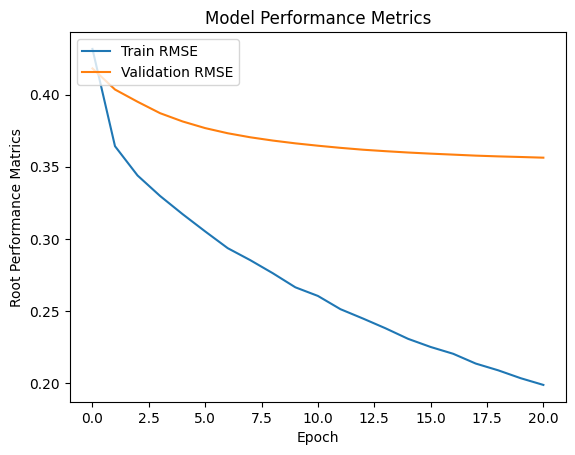

In [115]:
import matplotlib.pyplot as plt

plt.plot(training_history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(training_history.history['val_root_mean_squared_error'],label='Validation RMSE')
plt.title('Model Performance Metrics')
plt.ylabel('Root Performance Matrics')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [119]:
import os

# Tentukan path untuk menyimpan model
model_save_path = "path_to_save_model/my_model.h5"
model_directory = os.path.dirname(model_save_path)

# Buat direktori jika belum ada
os.makedirs(model_directory, exist_ok=True)

# Simpan model ke dalam direktori dengan ekstensi .keras
recommender_model.save(model_save_path)
